# DSCI 531 Lab 4 - Exploratory data analysis

## Introduction

In this lab, you will be choosing a dataset to do some exploratory data analysis. Your goal is to produce a readable, runnable jupyter notebook that takes your audience through the various stages of exploratory data analysis from initially loading the data, to any wrangling or cleaning needed, and finally visualizing trends in the data to help answer the research questions. The purpose of this lab is for you to practice EDA with visualizations and a little bit of wrangling. Its purpose is NOT for you to spend a tonne of time cleaning your data. The sample datsets provided require minimal cleaning. If you choose your own dataset, please ensure you avoid datasets that require too much cleaning. No matter which dataset you choose, there will likely be some wrangling involved. To help you with exploring the data, coming up with good research questions, and any wrangling, the DSCI 531 teaching team has scheduled additional office hours this week to help you. 

**In addition, Tom has very kindly agreed to open up the instructor and TAs office hours for DSCI 523 for you to get additional help with wrangling.** Though we will not be explicitly assessing wrangling in 531, I encourage you to use our office hours to help you explore the dataset you choose! Note: wrangling can be done in either R or python (if in R, save the wrangled data to disk and read it in) but the plots in this lab must be done in Altair. 

- **The final version of Lab 4 needs to be submitted by the usual weekly deadline (Saturday November 9th at 6PM)**
- **Your peer-review is due at a special time, on Tuesday November 12th at 11:59 PM.**

<img src="https://i.imgur.com/D0kcArC.png" alt="Read_This" style="width: 150px;"/>

## Lab 4 Learning Outcomes

In this lab you will:

- Develop an exploratory data analysis plan with an unfamiliar dataset
- Apply effective design principles to visual representations of data
- Use the `Altair` library in `python` to generate visual representations of data for several plot types

## How will I be graded?

- The MDS rubrics can be found [here](https://github.com/UBC-MDS/public/tree/master/rubric). 
- Solutions to the practice problems are provided in the students repo for the course
- Each question below is assigned points assigned to MDS rubrics 

## Overall submission
rubric={mechanics:5, writing: 18}

- Please make sure you check your spelling, grammar, punctuation, and ensure that your writing has good logical structure and flow
- To submit this assignment, submit this jupyter notebook with your answers embedded in the appropriate cells.
- Update your README file with the questions and links to your submission.
- Follow the general [lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

## Pre-lab

- Think a bit about which dataset you would like to use for lab 4. The lab will be your opportunity to get feedback from TAs about your ideas on how to explore the dataset you chose. In this lab, you will also be able to use your own data set to do some exploratory data analysis

In [1]:
# Load packages

import pandas as pd
import altair as alt

# Need to enable this to allow work with larger datasets (https://altair-viz.github.io/user_guide/faq.html)
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## 0. Choose a dataset

The first three options are all part of the `vega-datasets` python package. You can browse other vega datasets [here](https://observablehq.com/@randomfractals/vega-datasets).

Option 1: [`Jobs`](https://raw.githubusercontent.com/vega/vega-datasets/master/data/jobs.json)

Option 2: [`Movies`](https://raw.githubusercontent.com/vega/vega-datasets/master/data/movies.json)

Option 3: [`Stocks`](https://raw.githubusercontent.com/vega/vega-datasets/master/data/stocks.csv)

Option 4: Choose your own dataset (highly recommended that you get this approved by a DSCI531 TA during labs, or office hours)

You can search for other datasets here:

- [fivethirtyeight](https://data.fivethirtyeight.com)
- [Buzzfeed](https://github.com/BuzzFeedNews/everything)
- [Data.gov](https://www.data.gov/)
- [data.world](https://data.world/) (requires free account)

**Note: Though it may sound easy, it is not trivial to choose an interesting and relevant dataset. There are thousands out there and the [tyranny of choice](https://www.economist.com/christmas-specials/2010/12/16/you-choose) is pretty overwhelming. If you really want to choose your own dataset, I'd suggest you set a 30 minute timer, start searching, and then choose one before the timer expires. I advise you NOT to sink too much time into choosing a dataset as it's not the purpose of this lab.**

## 1. Describe your dataset
rubric:{reasoning:4}

**Task: Describe your dataset. Consider the following questions to guide you in your exploration**

- Who: Which company/agency/organization provided this data?
- What: What is in your data?
- When: When was your data collected (for example, for which years)?
- Why: What is the purpose of your dataset? Is it for transparency/accountability, public interest, fun, learning, etc...
- How: How was your data collected? Was it a human collecting the data? Historical records digitized? Server logs?

*Submission Hint: You probably will not need more than 250 words to describe your dataset. All the questions above do not need to be answered, it's more to guide your exploration and think a little bit about the context of your data. It is also possible you will not know the answers to some of the questions above, that is FINE - data scientists are often faced with the challenge of analyzing data from unknown sources. Do your best, acknowledge the limitations of your data as well as your understanding of it. Also, make it clear what you're speculating about. For example, "I speculate that the {...column_name...} column must be related to {....} because {....}."*

> I am using a [Kaggle dataset of supermarket sales](https://www.kaggle.com/aungpyaeap/supermarket-sales/download). The documentation does not tell us which supermarket this is but we can tell from the dataset that the supermarkets are located in Myanmar. This data contains supermarket transactions for 3 different branches of the same supermarket from January to March 2019. 

> Some examples of attributes available for each transaction is as follows:
- Invoice ID as a unique identifier
- Branch A, B and C
- City that the branch is in
- Type of customer to identify those using a member card
- Gender of the customer
- Product categories of the transaction
- Fields for average unit price, quantity of products, total price
- Date of purchase
- Method of payment
- Customer satisfaciton of their shopping experience

> It seems that the data set was posted for learning. It is not a part of a Kaggle competition so the company was not explicitly asking for or incentivizing the Kaggle community to analyze the data
> The data is likely collected by the point of sale (POS) system at the supermarket. This data seems to have been cleaned or combined though since it is not normal for POS systems to have gross margin data and gender of the purchaser. Especially with the customer satisfaction rating, it could be that customers were incentivized after their purchase to "scan their receipt and fill out a survey".

## 2. Load the dataset
rubric:{correctness:1}

**Task: Load your dataset from a file, or URL. This needs to be a pandas dataframe so you can use it with Altair. Remember that others may be running your jupyter notebook so it's important that the data is accessible to them. If your dataset isn't accessible as a URL, make sure to commit it into your repo.**

In [2]:
df = pd.read_csv('data/supermarket_sales.csv',
                 parse_dates = {'Date_time': ['Date', 'Time']})
df.head()

,Date_time,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


## 3. Explore your dataset
rubric:{correctness:5}

**Task: Explore the columns in your dataset. Which ones are interesting/relevant? You can use the same scheme I outlined in Lab 3, Exercise 2 or come up with your own system. By now, you should also know about [df.describe()](http://www.datasciencemadesimple.com/descriptive-summary-statistics-python-pandas/) so you can use that as an aid if you think it's useful and appropriate.**

> I use `df.info()` to check if there are any missing values in my dataset. It seems like there aren't any.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
Date_time                  1000 non-null datetime64[ns]
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(7)
memory usage: 125.1+ KB


> I calculate some basic characteristics of each of the columns of the dataset below.

In [4]:
# number of observations
print("There are", df.shape[0], "transactions in this dataset. \n")

# number of branches
print("There are", len(df['Branch'].unique()), 
      "branches and they are", list(df['Branch'].unique()), "\n")

# number of cities
print("There are", len(df['City'].unique()),
      "cities and they are", list(df['City'].unique()), "\n")

# number of transactions made by women vs. men
print("There are", df.query('Gender == "Female"').shape[0],
      "transactions made by women and ", df.query('Gender == "Male"').shape[0],
      "transactions made by men. \n")

# number of transactions for each product line
print("There are", df.query('`Product line` == "Health and beauty"').shape[0],
      "transactions in Health and Beauty,", 
      df.query('`Product line` == "Electronic accessories"').shape[0],
      "transactions in Electronic Accessories,", 
      df.query('`Product line` == "Home and lifestyle"').shape[0],
      "transactions in Home and Lifestyle,", 
      df.query('`Product line` == "Sports and travel"').shape[0],
      "transactions in Sports and Travel,",
      df.query('`Product line` == "Fashion accessories"').shape[0],
      "transactions in Fashion accessories, and",
      df.query('`Product line` == "Food and beverages"').shape[0],
      "transactions in Food and Beverages. \n")

# min, max and average unit price
print("Minimum unit price is", df['Unit price'].min(),
      ", maximum is", df['Unit price'].max(),
      ", and average is", round(df['Unit price'].mean(), 2), "\n")

# min, max and median quantity
print("Minimum quantity of items is", df['Quantity'].min(),
      ", maximum is", df['Quantity'].max(),
      ", and median is", df['Quantity'].median(), "\n")

# min, max and average transaction total
print("Minimum transaction total is", round(df['Total'].min(), 2),
      ", maximum is", round(df['Total'].max(),2),
      ", and average is", round(df['Total'].mean(), 2), "\n")

# min, max and average customer satisfaction
print("Minimum customer satisfaction rating is", round(df['Rating'].min(), 2),
      ", maximum is", round(df['Rating'].max(),2),
      ", and average is", round(df['Rating'].mean(), 2), "\n")

There are 1000 transactions in this dataset. 

There are 3 branches and they are ['A', 'C', 'B'] 

There are 3 cities and they are ['Yangon', 'Naypyitaw', 'Mandalay'] 

There are 501 transactions made by women and  499 transactions made by men. 

There are 152 transactions in Health and Beauty, 170 transactions in Electronic Accessories, 160 transactions in Home and Lifestyle, 166 transactions in Sports and Travel, 178 transactions in Fashion accessories, and 174 transactions in Food and Beverages. 

Minimum unit price is 10.08 , maximum is 99.96 , and average is 55.67 

Minimum quantity of items is 1 , maximum is 10 , and median is 5.0 

Minimum transaction total is 10.68 , maximum is 1042.65 , and average is 322.97 

Minimum customer satisfaction rating is 4.0 , maximum is 10.0 , and average is 6.97 



> In addition to the above exploration, I explore the columns by viewing the first few rows of data and explorint some descriptive statistics of the quantitative columns. 

In [5]:
df.head()

,Date_time,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


> - **Unit price**: It seems that this column is just taking an average price of the items in a particular transaction. Usually, a transaction would contain multiple items so it's strange that there is only one unit price.
- **Quantity**: They seem to be all integers - this is good and consistent with what I would expect for counts of items.
- **Tax 5%**: It seems that this column takes the $\text{unit price} * \text{quantity} * 0.05$. This makes sense. This columns is probably not very useful for analysis.
- **Total**: It seems that this column is $(\text{unit price} * \text{quantity}) + \text{tax}$. This column is the transaction total, including tax.
- **COGS, Gross margin percentage and Gross income**: COGS stands for cost of goods sold in business. To explain how these columns relate to each other:
$$\text{Price} - \text{COGS} = \text{Gross income}$$
$$\frac{\text{Gross income}}{\text{Price}} = \textrm{Gross margin percentage}$$
    - **Gross margin percentage**:  This seems to be the same across all transactions. This is highly unusual. Usually different items have different profit margins and each transaction's profit margin would reflect the margin of the mix of products in the transaction. It seems that they have applied a company-wide gross margin to each transaction. This limits the analyses I can do on this dataset. For example, I can no longer determine whether some transactions are more profitable than others.
    - **COGS and Gross income**: It seems that these columns follow the mathematical relationships outlined above and therefore does not discriminate between the product mix in each transaction.

## 4. Initial thoughts
rubric={correctness:1}

**Task: Use this a place to record any observations you come up with, anything jump out at you as surprising or particularly interesting? Where do you think you'll go with exploring this dataset? Feel free to take notes in this section and use it as a scratch pad. Any content in this area will not be marked, other than for completeness.**

> - Given the limitations of the dataset described above, I can probably correlate characteristics of transactions to one another without diving too deep into profits / profit margins. 
- Some examples of analyses that can be done are:
    - How does customer satisfaction relate to total dollars purchased?
    - How does gender relate to total dollars purchased?
    - How does type of products that a customer buys relate to dollars purchased and per unit cost? 
    - Does the day of the week relate to transaction size or type of products purchased?


## 5. Wrangling
rubric={correctness:1}

**Task: You can do any wrangling you need to do here. If you prefer to wrangle in R, that's fine - go ahead and wrangle the data in a different notebook, then export the data as a CSV and then load it in again as a new pandas dataframe. Describe what you're doing (or did) using comments within your code.**

In [7]:
# add day of the week
df['Day_of_week'] = df['Date_time'].dt.weekday_name

# add week number
df['Week_num'] = df['Date_time'].dt.week

# categorize weekday or weekend
df['Weekday_weekend'] = (df['Day_of_week'].apply(
    lambda x: 'Weekend' if x == 'Saturday' or  x == 'Sunday' else 'Weekday'))
df.head()

,Date_time,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Day_of_week,Week_num,Weekday_weekend
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,Weekend
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,Friday,10,Weekday
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,Sunday,9,Weekend
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,4,Weekend
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,Friday,6,Weekday


## 6. Research questions
rubric={reasoning:5}

**Task: come up with at least two research questions about your dataset that will require data visualizations to help answer. Recall that for this purpose, you should only aim for "Descriptive" or "Exploratory" research questions.**

> 1. How do each store's and product line's sales contribute to weekly sales trends? 
    - This is a question I commonly ask when I get sales transaction datasets. I'm trying to quickly find out if there is a particular store or product line that contributes a disproportionate amount in sales from week to week. 
    - This enables me to prioritize any further analysis - I either focus on stores or product lines that generate the most revenue first or identify weeks of poor sales to try to understand what led to low sales numbers. 
2. In weeks of poor sales, is there less customer traffic or are the transaction sizes smaller?
    - From answering the first research question, I identified that weeks 1, 8 and 13 had the lowest sales. I want to understand if we can pinpoint it whether there are less customers going to stores or if around same number of customers are going to stores but they are spending less. 
    - We can leverage the relationship of $(\text{\$ of sales} = \text{No. of transactions} * \text{\$ per transaction})$, to understand why sales dropped. Either less customers shopped or when they shopped they spent less or both. 

## 7. Data Analysis & Visualizations

rubric={viz:40, reasoning:10}

**Task: Create data visualizations (and justify your choices) using Altair that will help you answer your research questions.**

*Submission Note: It is difficult to give guidelines on how many because so much depends on your choice of research questions. That being said, you should aim for 2-3 high quality effective visualizations (and no more than 4). A faceted plot counts as one visualization. If you cannot come up with 2 effective visualizations, perhaps you need to re-think your research questions (or add more). If you need more than 4, perhaps it's a sign that your research question is too broad. Use your judgment, and understand that we will mark this section as a whole on quality rather than quantity. It is better to have fewer truly effective plots that directly address the research question, than pages and pages of plots that are hard to interpret. You will be evaluated on both your visualization itself (viz rubric) and your justification for selecting it (reasoning rubric).*

*Submission Note 2: Remember the website from [data to viz](https://www.data-to-viz.com) to help you choose appropriate visualizations.*



**Research Question 1: How do each store's and product line's sales contribute to weekly sales trends?**

I chose to plot 3 line charts. 
- The first shows total sales by week so that I can understand trends for weekly sales for the entire supermarket chain. 
- The second is also weekly sales, but separated by store. I chose not to use a stacked bar chart to represent this since there are only 3 lines and areas of the stacked bar chart would be harder to interpret than 3 coloured lines. A line chart would also enable me to compare sales between stores more easily, especially since sales are on a similar range between stores. 
- The third plot are faceted line charts of weekly sales by product category. Since there are 6 product categories, it made sense to show them faceted instead of as multiple colors on the same plot. By ensuring that the axes are the same between each faceted plot, I can still compare sales across product lines. 

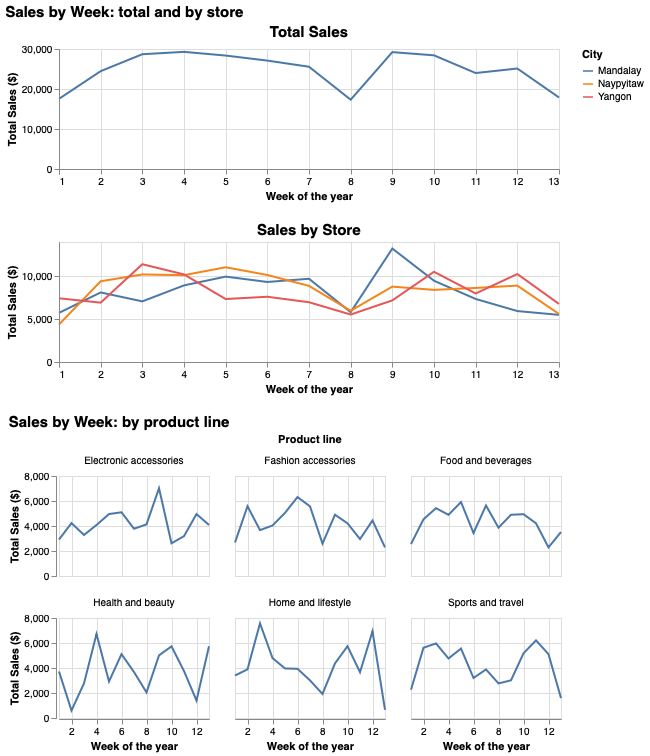

In [12]:
# create total sales by week chart
sales_by_week = df.groupby(['Week_num'])['Total'].agg('sum').reset_index()
by_week = alt.Chart(sales_by_week).mark_line().encode(
    alt.X('Week_num', title = "Week of the year"),
    alt.Y('sum(Total):Q', title = "Total Sales ($)"),
    alt.Tooltip(['Week_num', 'Total'])
).properties(
    title = "Total Sales",
    width = 500,
    height = 120
)

# disaggregate total sales by week to sales by store
sales_by_city = df.groupby(['City', 'Week_num'])['Total'].agg('sum').reset_index()
by_city = alt.Chart(sales_by_city).mark_line().encode(
    alt.X('Week_num', title = "Week of the year"),
    alt.Y('sum(Total):Q', title = "Total Sales ($)"),
    alt.Color('City'),
    alt.Tooltip(['City', 'Total'])
).properties(
    title = "Sales by Store",
    width = 500,
    height = 120
)

# disaggreagate total sales by week to each product line
sales_by_product = df.groupby(['Product line', 'Week_num'])['Total'].agg('sum').reset_index()
by_product = alt.Chart(sales_by_product).mark_line().encode(
    alt.X('Week_num', title = "Week of the year"),
    alt.Y('Total:Q', title = "Total Sales ($)"),
    alt.Tooltip(['Product line', 'Total'])
).properties(
    width = 150,
    height = 100
).facet(
    alt.Facet('Product line'),
    columns = 3,
    title = "Sales by Week: by product line"
)

# combine all charts
(alt.vconcat(by_week, by_city, by_product)
    .properties(title = "Sales by Week: total and by store")
    .configure_title(fontSize = 15)
)


**Research Question 2: In weeks of poor sales, is there less customer traffic or are the transaction sizes smaller?**

I chose to plot a bar chart for customer traffic and a boxplot for transaction size. 
- **Customer traffic:** I am using the number of transactions by week as a proxy for customer traffic. I plot this on a simple bar chart, highlighting the weeks of low sales (Weeks 1, 8, and 13 as identified in the previous analysis) for easier comparison. Bar charts are easy to understand for simple data like this and enables highlighting by week which I would not be able to do on a line chart.
- **Transaction size:** I want to show the distribution of transaction sizes by week since the median or average will mask a lot of underlying detail. I made a box plot since it’s easy to compare medians and 25th/75th percentile values across weeks compared to a jitter or strip plot. I also added a line for median transaction size overall as a comparison. 

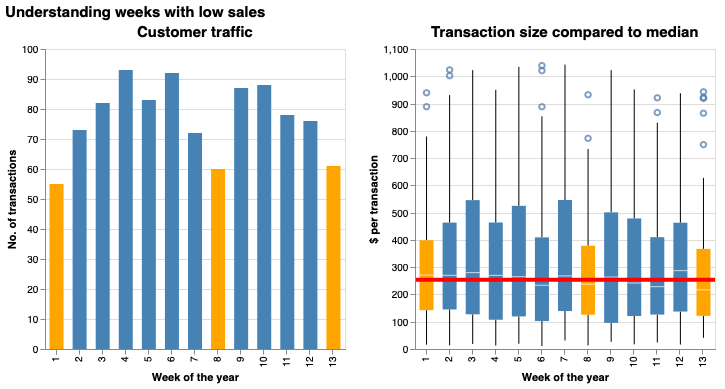

In [106]:
# create customer traffic bar chart
traffic = alt.Chart(df).mark_bar(size = 14).encode(
    alt.X('Week_num:O', title = "Week of the year"),
    alt.Y('count(Invoice ID):Q', title = "No. of transactions"),
    color = alt.condition(
        (alt.datum.Week_num == 1) | (alt.datum.Week_num == 8) | (alt.datum.Week_num == 13),
        alt.value('orange'),
        alt.value('steelblue'))
).properties(
    title = "Customer traffic",
    width = 300,
    height = 300
)

# create transaction size box plot
transaction = alt.Chart(df).mark_boxplot().encode(
    alt.X('Week_num:O', title = "Week of the year"),
    alt.Y('Total:Q', title = "$ per transaction"),
    color = alt.condition(
        (alt.datum.Week_num == 1) | (alt.datum.Week_num == 8) | (alt.datum.Week_num == 13),
        alt.value('orange'),
        alt.value('steelblue'))
).properties(
    title = "Transaction size compared to median",
    width = 300,
    height = 300
)

# add line for median transaction size across all transactions
median_transaction = alt.Chart(df).mark_rule(color = 'red', size = 4).encode(
    y = 'median(Total):Q'
)

# show plots together
(traffic | (transaction + median_transaction)
).properties(
    title = "Understanding weeks with low sales"
).configure_title(
    fontSize = 15
)


## 8. Summary and conclusions
rubric={reasoning:10}

**Task: Summarize your findings and describe any conclusions and insight you were able to draw from your visualizations.**

-----

**Research Question 1: How do each store's and product line's sales contribute to weekly sales trends?**

Based on the analysis included below, I have found that no particular store or product line is consistently responsible for the peaks and troughs in total sales from week to week. Some interesting insights are:
- Mandalay store was responsible for the spike in sales in Week 9 but not in Week 4
- Health & Beauty products had high sales in both weeks 4 and 9 where there were high total sales; Health & Beauty even had high sales in week 13 when overall sales were low.
- All stores and most products performed less than average in weeks where there were poor sales

I would be interested in the following for further analysis:
- What led to the increase in sales in Week 9 for the Mandalay store? Is it a particular product line or customer type?
- In weeks of poor sales, is there less customer traffic or are the transaction sizes smaller? 

I break down my insights for each chart:
- **Total sales:**
	- Total sales are quite stable over the 3 month period with the lowest performing weeks being Week 1, 8 and 13. 
	- Sales peak in weeks 4 and 9. 
	- I would be interested to see if by store and by product sales follows these trends. 
- **Sales by store:**
	- It seems that when the supermarket chain has low sales, all stores have low sales. We can see that in Weeks 1, 8 and 13, all stores experience lower sales than usual. 
	- Sales peaked overall in Week 4 because all 3 stores were doing moderately well; Week 4 sales were not particularly high for any individual store. 
	- Sales peaked in Week 9 because of the Mandalay store. Week 9 was only an average week for the other two stores. 
	- It would be interesting to investigate if a particular product line or type of customer contributed to increased sales in Week 9. 
- **Sales by product line:**
	- In weeks 1, 8 and 13 of low sales, it doesn’t seem like any of the products sold well. There is one exception: Health & Beauty products in week 13. 
	- In weeks 4 and 9, when total sales peak, it is due to a particular combination of product lines doing well but this combination is not the same in Week 4 as in Week 9. In Week 4, Health and Beauty has record sales. In Week 9, Health & Beauty and Electronic Accessories have exceptionally high sales. 
	- Health & Beauty and Home & Lifestyle products have the most volatile sales of all product categories. They both have maximum weekly sales of above \\$7000 but also minimum weekly sales of below \\$1000. 

-------

**Research Question 2: In weeks of poor sales, is there less customer traffic or are the transaction sizes smaller?**
- **Customer traffic:** It is clear that the weeks of lowest sales also have the lowest customer traffic measured in number of transactions. 
- **Transaction size:** The weeks of lowest sales seem to have fewer large transactions. The weeks highlighted in orange have the smallest 75th percentile transactions. However, these weeks do not necessarily have the lowest median transactions.
- It seems that the combination of less customers going to stores and those customers having a lower likelihood of making big transactions is what is responsible for the weeks of lower sales. 
- I would be interested in further understanding:
	- In the weeks of lower customer traffic, is it non-members who are visiting stores less or are members visiting stores less as well?
	- Are there particular product lines that lead to big versus small transaction sizes? Is that what is responsible for the reduced number of big transactions in weeks with low sales? 

## (Optional) 9. Contribute to the Altair package (up to 15 marks)

#### Call for contributions

This message is from the Altair developers:

> We are always interested in new examples contributed from the community.  These could be everything from simple one-panel scatter and line plots, to more
complicated layered or stacked plots, to more advanced interactive features. Before submitting a new example check the [Altair Example
Gallery](https://altair-viz.github.io/gallery/index.html) to make sure that
your idea has not already been implemented. 
> 
>The easiest way to get started would be to adapt examples from the [Vega-Lite
example gallery](https://vega.github.io/vega-lite/examples/) which are missing
in the altair gallery. Or you can feel free to be creative and build your own
visualizations.

**After going through two weeks of using Altair, you have likely learned many things about its syntax. As the Altair package is still in its infancy and the documentation is still improving, I want to give you a chance to contribute your knowledge and experience back to this open source project. Below are the instructions:**

- Go to the issues page of my [fork of the Altair repo](https://github.com/firasm/DSCI_531_2019_altair/issues)
- If you know the contribution you want to make, create an issue and tag me (@firasm) so I can give you the go-ahead and assign your future contribution an effort level (see below)
- If you do not know the contribution you want to make, browse the list of issues and comment on one you'd like to tackle. It will be first come, first served
- I have added all of you as contributors to the repo with write access and protected only the master branch
- Checkout a new branch with your cwl and a brief [slug](https://en.wikipedia.org/wiki/Slug_(publishing)) identifying your change (for e.g., `fmoosvi-histogram_line`)
- Work on your branch, and once you're done send a PR to my fork. 
- That is sufficient for you to get the optional marks on this question. 
- We'll then review it and give you feedback, or make minor changes ourselves and then submit it to the main Altair repo (crediting you as the original author)
- It's preferred to use one of the vega datasets as they're open and easily accessible
- There are four levels of contributions and they're awarded points based on amount of effort:
    - Extreme effort (e.g.: Multiple plot examples, case studies, or major improvements with documentation - 15 points)
    - High effort (e.g.: Complex plot examples, case study, or documentation improvements - 10 points)
    - Moderate effort (e.g.: A plot example, or minor improvements to documentation - 5 points)
    - Basic effort (e.g.: Minimal effort plots and/or changing existing examples to do wrangling using pandas rater than Altair - 1 point)

- Once you have an example you would like to add there are a few guide lines to follow. Every example should:
    - be saved as a stand alone `.py` file in the `altair/examples/` [directory](https://github.com/firasm/DSCI_531_2019_altair/tree/master/altair/examples).
    - have a descriptive docstring, which will eventually be extracted for the
  documentation website.
    - contain a category tag (possible options: Simple Charts, Bar Charts, Line Charts, Area Charts, Scatter Plots, Histograms, Interactive Charts, Case Studies, Other Charts)
    - define a chart variable with the main chart object (This will be used both in the unit tests to confirm that the example executes properly, and also eventually used to display the visualization on the documentation website).
    - not make any external calls to download data within the script (i.e. don't
  use urllib). You can define your data directly within the example file,
  generate your data using pandas and numpy, or you can use data
  available in the `vega_datasets` package.

> Add a link to your PR and issue here.
>
> Link to GH issue: 
>
> PR to Firas' fork: 

### (Optional) 9.1 Extreme effort 
rubric={quality:15}

### (Optional) 9.2 High effort 
rubric={quality:10}

### (Optional) 9.3 Moderate effort 
rubric={quality:5}

### (Optional) 9.4 Basic effort 
rubric={quality:1}